In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

## Path to Import

In [56]:
path_import = "raw_data/male_players.csv"
path_eksport = "summary_team.csv" 

## Summary

In [55]:
## Import
data = pd.read_csv(path_import).drop('Unnamed: 0', axis=1)

## Processing
club_data = []
for i in list(data.Club.unique()):
    count_ = data['Name'].loc[data['Club'] == i].count()
    att = round(data['Overall'].loc[(data['Club'] == i) & (data['Position'].isin(['CF', 'SS', 'LW', 'RW', 'ST', 'FW']))].mean(), 2)
    mid = round(data['Overall'].loc[(data['Club'] == i ) & (data['Position'].str.contains('M', na=False))].mean(), 2)
    deff = round(data['Overall'].loc[(data['Club'] == i ) & (data['Position'].str.contains('B', na=False)) | (data['Position'] == 'SW')].mean(), 2)
    average = round(data['Overall'].loc[data['Club'] == i].mean(), 2)
    club_data.append([i, count_, att, mid, deff, average]) 

nation_data = []
for i in list(data.Nation.unique()):
    count_ = data['Name'].loc[data['Nation'] == i].count()
    nation_data.append([i, count_, average]) 

position_count = []
for i in list(data.Position.unique()):
    count_ = data['Name'].loc[data['Position'] == i].count()
    position_count.append([i, count_]) 

club_data = sorted(club_data, key=lambda x: x[4], reverse=True)

## Eksport
with open(path_eksport, 'w', newline='', encoding='utf-8') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['Club', 'Player', 'ATTK', 'MID', 'DEFF', 'Overall'])
    for row in club_data:
        writer.writerow(row)

## Visual Data

Nation

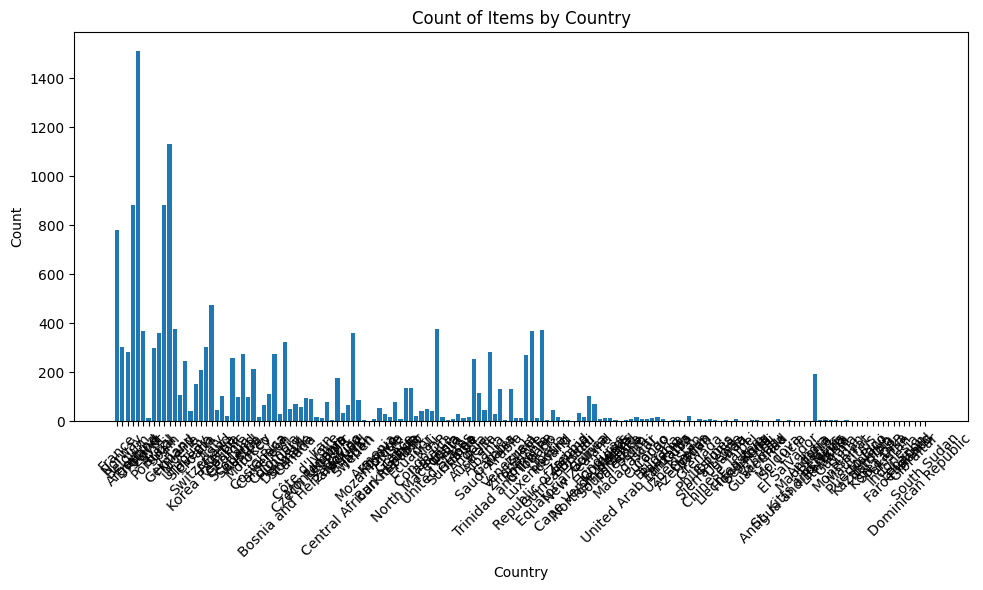

In [11]:
nation = [item[0] for item in nation_data]
count_player = [item[1] for item in nation_data]

plt.figure(figsize=(10, 6))
plt.bar(nation, count_player)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of Items by Country')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

Position

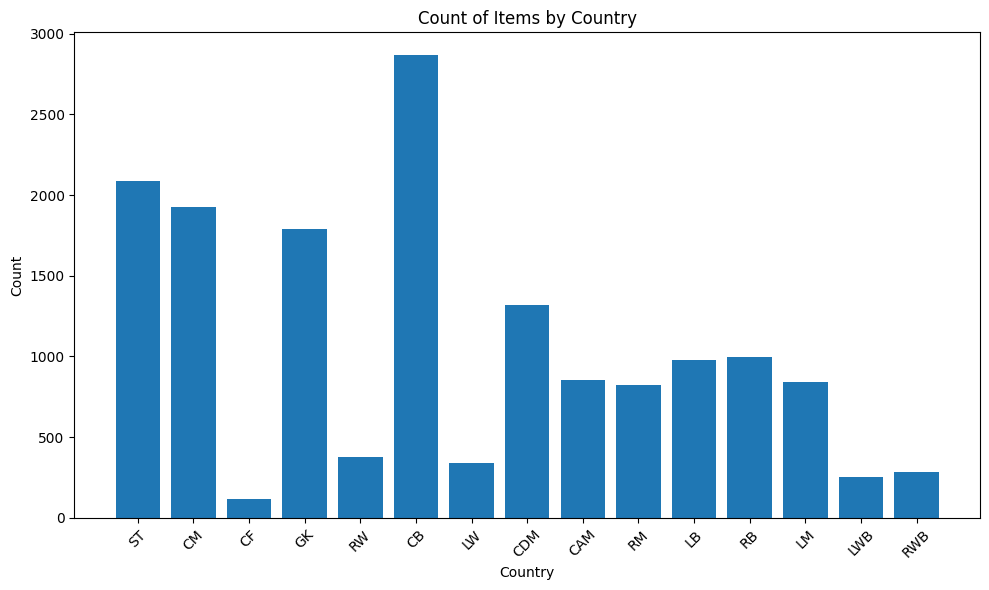

In [12]:
position = [item[0] for item in position_count]
count_player = [item[1] for item in position_count]

plt.figure(figsize=(10, 6))
plt.bar(position, count_player)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of Items by Country')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

## Get Info Player

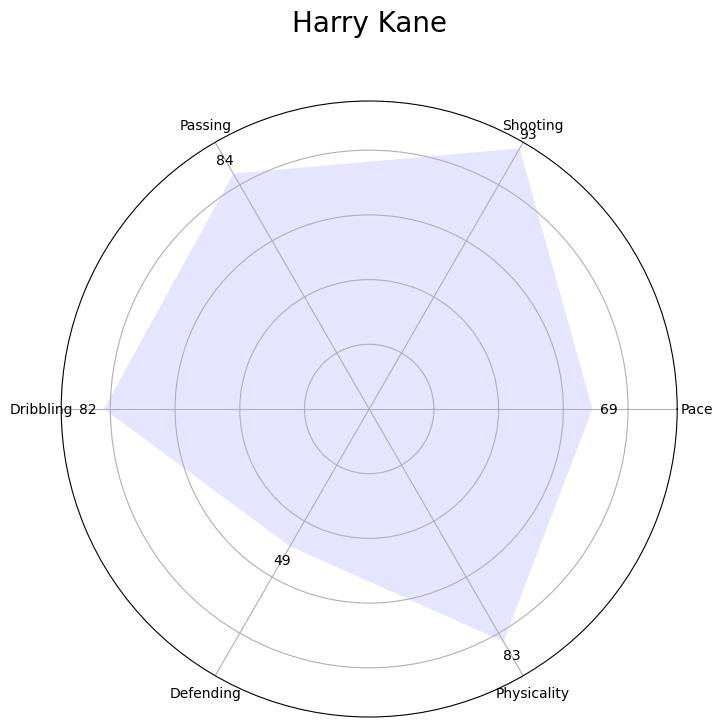

In [13]:
input_team = 'FC Bayern München'
input_player = 'Harry Kane'

club_info = data.loc[data['Club'] == input_team]
list_player = club_info[['Name', 'Position']].sort_values('Position', ascending=False)
get_player = club_info.loc[club_info['Name'] == input_player]

attributes = ['Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physicality']
average_attributes = get_player[attributes].values[0]

num_attributes = len(attributes)

angles = np.linspace(0, 2 * np.pi, num_attributes, endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], attributes, color='black', size=10)

average_attributes = np.append(average_attributes, average_attributes[:1])
ax.fill(angles, average_attributes, 'b', alpha=0.1)
ax.set_yticklabels([])  
plt.title(input_player, size=20, color='black', y=1.1)

for i in range(num_attributes):
    angle_rad = angles[i]
    ax.text(angle_rad, 
        average_attributes[i] + 5, str(average_attributes[i]), ha='center', va='center')

plt.show()


## Get Info Team

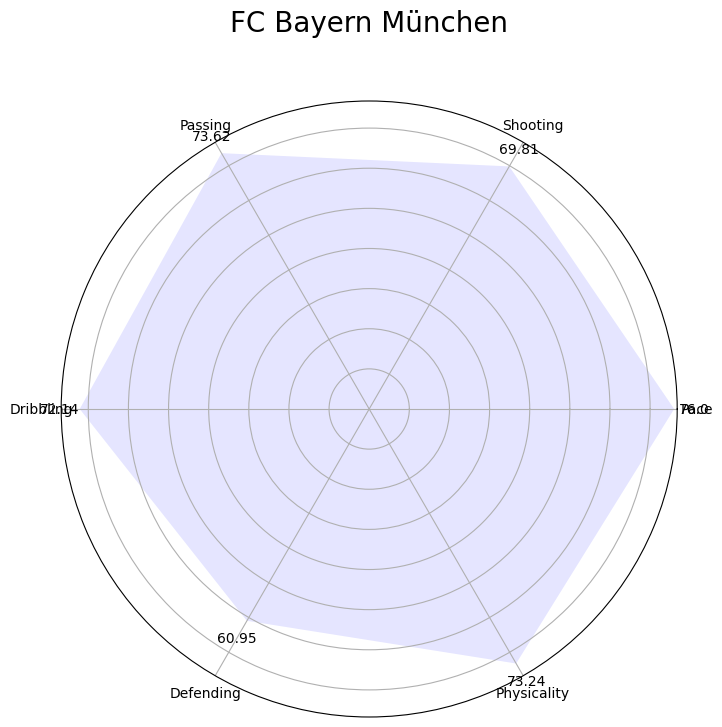

In [14]:
input_team = 'FC Bayern München'
club_info = data.loc[data['Club'] == input_team]
attributes = ['Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physicality']

average_attributes = club_info[['Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physicality']].mean()
for k in average_attributes.keys():
    average_attributes[k] = round(average_attributes[k],2)

num_attributes = len(attributes)

angles = np.linspace(0, 2 * np.pi, num_attributes, endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], attributes, color='black', size=10)

average_attributes = np.append(average_attributes, average_attributes[:1]) 
ax.fill(angles, average_attributes, 'b', alpha=0.1)
ax.set_yticklabels([])  
plt.title(input_team, size=20, color='black', y=1.1)

for i in range(num_attributes):
    angle_rad = angles[i]
    ax.text(angle_rad, 
        average_attributes[i] + 5, str(average_attributes[i]), ha='center', va='center')

plt.show()

## Top Player

In [72]:
top10_att = data.loc[data['Position'].isin(['CF', 'SS', 'LW', 'RW', 'ST', 'FW'])].sort_values('Overall', ascending=False).head(10)
top10_mid = data.loc[data['Position'].str.contains('M', na=False)].sort_values('Overall', ascending=False).head(10)
deff = data.loc[(data['Position'].str.contains('B', na=False)) | (data['Position'] == 'SW')].sort_values('Overall', ascending=False)
top10_deff = deff.head(10)
top10_l_deff = deff.loc[data['Position'].str.contains('L', na=False)].sort_values('Overall', ascending=False).head(10)
top10_c_deff = deff.loc[data['Position'].str.contains('C', na=False)].sort_values('Overall', ascending=False).head(10)
top10_r_deff = deff.loc[data['Position'].str.contains('R', na=False)].sort_values('Overall', ascending=False).head(10)
top10_gk = data.loc[data['Position'] == 'GK'].sort_values(['GK','Overall'], ascending=False).head(10)

In [75]:
top10_gk

,Name,Nation,Club,Position,Age,Overall,Pace,Shooting,Passing,Dribbling,...,Strength,Aggression,Att work rate,Def work rate,Preferred foot,Weak foot,Skill moves,URL,Gender,GK
5,Thibaut Courtois,Belgium,Real Madrid,GK,31,90,85,89,76,13,...,70,23,Medium,Medium,Left,3,1,https://www.ea.com/games/ea-sports-fc/ratings/...,M,93.0
13,Marc-André ter Stegen,Germany,FC Barcelona,GK,31,89,86,85,89,21,...,78,43,Medium,Medium,Right,4,1,https://www.ea.com/games/ea-sports-fc/ratings/...,M,91.0
137,Yann Sommer,Switzerland,Inter,GK,34,84,78,79,83,15,...,68,38,Medium,Medium,Right,4,1,https://www.ea.com/games/ea-sports-fc/ratings/...,M,90.0
15,Alisson,Brazil,Liverpool,GK,31,89,86,85,85,27,...,78,27,Medium,Medium,Right,3,1,https://www.ea.com/games/ea-sports-fc/ratings/...,M,89.0
29,Mike Maignan,France,Milan,GK,28,87,85,82,87,31,...,78,35,Medium,Medium,Right,4,1,https://www.ea.com/games/ea-sports-fc/ratings/...,M,89.0
31,Gregor Kobel,Switzerland,Borussia Dortmund,GK,25,87,86,84,74,24,...,81,24,Medium,Medium,Right,3,1,https://www.ea.com/games/ea-sports-fc/ratings/...,M,89.0
33,Gianluigi Donnarumma,Italy,Paris SG,GK,24,87,90,82,79,28,...,72,30,Medium,Medium,Right,3,1,https://www.ea.com/games/ea-sports-fc/ratings/...,M,89.0
229,Dominik Livaković,Croatia,Fenerbahçe,GK,28,82,80,76,71,19,...,75,26,Medium,Medium,Right,2,1,https://www.ea.com/games/ea-sports-fc/ratings/...,M,89.0
24,Jan Oblak,Slovenia,Atlético de Madrid,GK,30,88,85,90,78,12,...,78,36,Medium,Medium,Right,3,1,https://www.ea.com/games/ea-sports-fc/ratings/...,M,87.0
60,Wojciech Szczęsny,Poland,Juventus,GK,33,86,86,83,73,11,...,65,40,Medium,Medium,Right,3,1,https://www.ea.com/games/ea-sports-fc/ratings/...,M,87.0
